In [2]:
import polars as pl
import numpy as np
import re

import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scripts import style
style.mpl_apply()

# Merge

In [3]:
rs = pl.read_parquet("data/cephalosporines_clean/reports_short.parquet")
rs

REPORT_ID,DATRECEIVED,GENDER_ENG,AGE_Y,WEIGHT_KG,HEIGHT_CM
i64,datetime[ns],str,str,f64,f64
164,1973-06-18 00:00:00,"""Male""","""68""",47.0,173.0
173,1973-06-18 00:00:00,"""Male""","""42""",82.0,180.0
180,1973-06-18 00:00:00,"""Female""","""29""",null,null
346,1973-07-16 00:00:00,"""Female""","""""",null,null
356,1973-07-16 00:00:00,"""Female""","""21""",60.0,null
…,…,…,…,…,…
908140706,2025-06-25 00:00:00,"""Male""","""19""",null,null
908142798,2025-06-25 00:00:00,"""Male""","""59""",null,null
908147666,2025-06-27 00:00:00,"""Female""","""19""",null,null


In [4]:
rd = pl.read_parquet("data/cephalosporines_clean/report_drug.parquet")
rd

REPORT_DRUG_ID,REPORT_ID,DRUG_PRODUCT_ID,DRUGNAME,DRUGINVOLV_ENG,DRUGINVOLV_FR,ROUTEADMIN_ENG,ROUTEADMIN_FR,UNIT_DOSE_QTY,DOSE_UNIT_ENG,DOSE_UNIT_FR,FREQUENCY,FREQ_TIME,FREQUENCY_TIME_ENG,FREQUENCY_TIME_FR,FREQ_TIME_UNIT_ENG,FREQ_TIME_UNIT_FR,THERAPY_DURATION,THERAPY_DURATION_UNIT_ENG,THERAPY_DURATION_UNIT_FR,DOSAGEFORM_ENG,DOSAGEFORM_FR
i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
4419402,164,3503,"""LARGACTIL 50""","""Concomitant""","""Concomitant""","""Intramuscular""","""Intramusculaire""","""50""","""Milligram""","""Milligramme""","""""","""""","""""","""""","""""","""""","""1""","""Days""","""Jour(s)""","""SOLUTION INTRAMUSCULAR""","""SOLUTION POUR ADMINISTRATION I…"
4419405,164,32842,"""LIBRIUM""","""Concomitant""","""Concomitant""","""Oral""","""Oral""","""10""","""Milligram""","""Milligramme""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""NOT SPECIFIED""","""NON PRÉCISÉE"""
4419403,164,656,"""LASIX PARENTERAL INJ""","""Concomitant""","""Concomitant""","""Intravenous (not otherwise spe…","""Intraveineuse (sans autre préc…","""40""","""Milligram""","""Milligramme""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""LIQUID INTRAMUSCULAR""","""LIQUIDE POUR ADMINISTRATION IN…"
4419406,164,1625,"""APRESOLINE INJECTION 20MG/AMPO…","""Concomitant""","""Concomitant""","""Intramuscular""","""Intramusculaire""","""20""","""Milligram""","""Milligramme""","""""","""""","""""","""""","""""","""""","""1""","""Days""","""Jour(s)""","""POWDER FOR SOLUTION INTRAVENOU…","""POUDRE POUR SOLUTION INTRAVEIN…"
4419404,164,24440,"""KEFLIN""","""Suspect""","""Suspect""","""""","""""","""1""","""Gram""","""Gramme""","""4""","""1""","""Days""","""Jour(s)""","""4 every 1 Days""","""4 chaque 1 Jour(s)""","""""","""""","""""","""POWDER FOR SOLUTION INTRAMUSCU…","""POUDRE POUR SOLUTION INTRAMUSC…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
4949073,908149644,58275,"""CEPHALEXIN""","""Concomitant""","""Concomitant""","""Unknown""","""Inconnu""","""250""","""Milligram""","""Milligramme""","""1""","""""","""""","""""","""""","""""","""""","""""","""""","""""",""""""
4949077,908149644,31567,"""MYRBETRIQ""","""Concomitant""","""Concomitant""","""Unknown""","""Inconnu""","""50""","""Milligram""","""Milligramme""","""1""","""""","""""","""""","""""","""""","""""","""""","""""","""TABLET (EXTENDED-RELEASE)""","""COMPRIMÉ (LIBÉRATION PROLONGÉE…"
4949078,908149644,33553,"""ACETYLSALICYLIC ACID""","""Concomitant""","""Concomitant""","""Unknown""","""Inconnu""","""81""","""Milligram""","""Milligramme""","""1""","""""","""""","""""","""""","""""","""""","""""","""""","""NOT SPECIFIED""","""NON PRÉCISÉE"""


In [5]:
rdi = pl.read_parquet("data/cephalosporines_clean/drug_product_ingredients.parquet")
rdi

DRUG_PRODUCT_INGREDIENT_ID,DRUG_PRODUCT_ID,DRUGNAME,ACTIVE_INGREDIENT_ID,ACTIVE_INGREDIENT_NAME
i64,i64,str,i64,str
29599010225,29599,"""BENZYDAMINE HYDROCHLORIDE/DICH…",10225,"""lidocaine hydrochloride"""
31212010225,31212,"""XYLOCAINE TOPICAL""",10225,"""lidocaine hydrochloride"""
54995010225,54995,"""BECLOMETHASONE DIPROPIONATE/LI…",10225,"""lidocaine hydrochloride"""
55044010225,55044,"""ALUMINUM HYDROXIDE/DIPHENHYDRA…",10225,"""lidocaine hydrochloride"""
58165010225,58165,"""LIDOCAINE HYDROCHLORIDE/NOREPI…",10225,"""lidocaine hydrochloride"""
…,…,…,…,…
3322005010254,33220,"""DIPHTHERIA TOXOID (+) PERTUSSI…",5010254,"""diphtheria toxoid (crm197)"""
3334505010254,33345,"""DTAP-IPV-HIB""",5010254,"""diphtheria toxoid (crm197)"""
3322705008968,33227,"""REACTINE UNSPECIFIED""",5008968,"""cetirizine hcl"""


In [6]:
rdfull = rd.join(rdi, on="DRUG_PRODUCT_ID", how="left")
rdfull

REPORT_DRUG_ID,REPORT_ID,DRUG_PRODUCT_ID,DRUGNAME,DRUGINVOLV_ENG,DRUGINVOLV_FR,ROUTEADMIN_ENG,ROUTEADMIN_FR,UNIT_DOSE_QTY,DOSE_UNIT_ENG,DOSE_UNIT_FR,FREQUENCY,FREQ_TIME,FREQUENCY_TIME_ENG,FREQUENCY_TIME_FR,FREQ_TIME_UNIT_ENG,FREQ_TIME_UNIT_FR,THERAPY_DURATION,THERAPY_DURATION_UNIT_ENG,THERAPY_DURATION_UNIT_FR,DOSAGEFORM_ENG,DOSAGEFORM_FR,DRUG_PRODUCT_INGREDIENT_ID,DRUGNAME_right,ACTIVE_INGREDIENT_ID,ACTIVE_INGREDIENT_NAME
i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,str,i64,str
4419402,164,3503,"""LARGACTIL 50""","""Concomitant""","""Concomitant""","""Intramuscular""","""Intramusculaire""","""50""","""Milligram""","""Milligramme""","""""","""""","""""","""""","""""","""""","""1""","""Days""","""Jour(s)""","""SOLUTION INTRAMUSCULAR""","""SOLUTION POUR ADMINISTRATION I…",350308017,"""LARGACTIL 50""",8017,"""chlorpromazine"""
4419402,164,3503,"""LARGACTIL 50""","""Concomitant""","""Concomitant""","""Intramuscular""","""Intramusculaire""","""50""","""Milligram""","""Milligramme""","""""","""""","""""","""""","""""","""""","""1""","""Days""","""Jour(s)""","""SOLUTION INTRAMUSCULAR""","""SOLUTION POUR ADMINISTRATION I…",350305009981,"""LARGACTIL 50""",5009981,"""chlorpramazine"""
4419405,164,32842,"""LIBRIUM""","""Concomitant""","""Concomitant""","""Oral""","""Oral""","""10""","""Milligram""","""Milligramme""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""NOT SPECIFIED""","""NON PRÉCISÉE""",32842010260,"""LIBRIUM""",10260,"""chlordiazepoxide hydrochloride"""
4419405,164,32842,"""LIBRIUM""","""Concomitant""","""Concomitant""","""Oral""","""Oral""","""10""","""Milligram""","""Milligramme""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""NOT SPECIFIED""","""NON PRÉCISÉE""",3284205000697,"""LIBRIUM""",5000697,"""chlordiazepoxide hydrochloride"""
4419405,164,32842,"""LIBRIUM""","""Concomitant""","""Concomitant""","""Oral""","""Oral""","""10""","""Milligram""","""Milligramme""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""NOT SPECIFIED""","""NON PRÉCISÉE""",32842010261,"""LIBRIUM""",10261,"""methaminodiazepoxide hcl"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
4949084,908149644,33586,"""TYLENOL""","""Concomitant""","""Concomitant""","""Unknown""","""Inconnu""","""""","""""","""""","""1""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""",33586010066,"""TYLENOL""",10066,"""acetyl-p-aminophenol"""
4949084,908149644,33586,"""TYLENOL""","""Concomitant""","""Concomitant""","""Unknown""","""Inconnu""","""""","""""","""""","""1""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""",3358605008605,"""TYLENOL""",5008605,"""acetaminophen (paracetamol)"""
4949084,908149644,33586,"""TYLENOL""","""Concomitant""","""Concomitant""","""Unknown""","""Inconnu""","""""","""""","""""","""1""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""",33586010067,"""TYLENOL""",10067,"""paracetamol"""


In [7]:
rs

REPORT_ID,DATRECEIVED,GENDER_ENG,AGE_Y,WEIGHT_KG,HEIGHT_CM
i64,datetime[ns],str,str,f64,f64
164,1973-06-18 00:00:00,"""Male""","""68""",47.0,173.0
173,1973-06-18 00:00:00,"""Male""","""42""",82.0,180.0
180,1973-06-18 00:00:00,"""Female""","""29""",null,null
346,1973-07-16 00:00:00,"""Female""","""""",null,null
356,1973-07-16 00:00:00,"""Female""","""21""",60.0,null
…,…,…,…,…,…
908140706,2025-06-25 00:00:00,"""Male""","""19""",null,null
908142798,2025-06-25 00:00:00,"""Male""","""59""",null,null
908147666,2025-06-27 00:00:00,"""Female""","""19""",null,null


In [8]:
reports_plus = rdfull.select(['REPORT_ID','ACTIVE_INGREDIENT_NAME']).join(rs, on ='REPORT_ID',how = 'right')

In [9]:
reports_plus

ACTIVE_INGREDIENT_NAME,REPORT_ID,DATRECEIVED,GENDER_ENG,AGE_Y,WEIGHT_KG,HEIGHT_CM
str,i64,datetime[ns],str,str,f64,f64
"""chlorpromazine""",164,1973-06-18 00:00:00,"""Male""","""68""",47.0,173.0
"""chlorpramazine""",164,1973-06-18 00:00:00,"""Male""","""68""",47.0,173.0
"""chlordiazepoxide hydrochloride""",164,1973-06-18 00:00:00,"""Male""","""68""",47.0,173.0
"""chlordiazepoxide hydrochloride""",164,1973-06-18 00:00:00,"""Male""","""68""",47.0,173.0
"""methaminodiazepoxide hcl""",164,1973-06-18 00:00:00,"""Male""","""68""",47.0,173.0
…,…,…,…,…,…,…
"""acetyl-p-aminophenol""",908149644,2025-06-30 00:00:00,"""Male""","""91""",null,null
"""acetaminophen (paracetamol)""",908149644,2025-06-30 00:00:00,"""Male""","""91""",null,null
"""paracetamol""",908149644,2025-06-30 00:00:00,"""Male""","""91""",null,null


In [10]:
reports_plus = reports_plus.with_columns(
    pl.col("DATRECEIVED").dt.year().alias("YEAR")
)

reports_filtered = reports_plus.filter(
    (pl.col("YEAR") >= 2021) & (pl.col("YEAR") <= 2025)
)
reports_filtered

ACTIVE_INGREDIENT_NAME,REPORT_ID,DATRECEIVED,GENDER_ENG,AGE_Y,WEIGHT_KG,HEIGHT_CM,YEAR
str,i64,datetime[ns],str,str,f64,f64,i32
"""omalizumab""",310510,2025-06-30 00:00:00,"""Male""","""49""",113.38,null,2025
"""omalizumab""",310510,2025-06-30 00:00:00,"""Male""","""49""",113.38,null,2025
"""omalizumab""",310510,2025-06-30 00:00:00,"""Male""","""49""",113.38,null,2025
"""omalizumab""",310510,2025-06-30 00:00:00,"""Male""","""49""",113.38,null,2025
"""acetaminophen""",310510,2025-06-30 00:00:00,"""Male""","""49""",113.38,null,2025
…,…,…,…,…,…,…,…
"""acetyl-p-aminophenol""",908149644,2025-06-30 00:00:00,"""Male""","""91""",null,null,2025
"""acetaminophen (paracetamol)""",908149644,2025-06-30 00:00:00,"""Male""","""91""",null,null,2025
"""paracetamol""",908149644,2025-06-30 00:00:00,"""Male""","""91""",null,null,2025


In [11]:
# keep REPORT_ID ACTIVE_INGREDIENT_NAME
rdmini = rdfull.select(["REPORT_ID", "ACTIVE_INGREDIENT_NAME"])
rdmini

REPORT_ID,ACTIVE_INGREDIENT_NAME
i64,str
164,"""chlorpromazine"""
164,"""chlorpramazine"""
164,"""chlordiazepoxide hydrochloride"""
164,"""chlordiazepoxide hydrochloride"""
164,"""methaminodiazepoxide hcl"""
…,…
908149644,"""acetyl-p-aminophenol"""
908149644,"""acetaminophen (paracetamol)"""
908149644,"""paracetamol"""


In [12]:
rs = None
rd = None
rdi = None

In [13]:
CEPH_GEN = {
    "cefaclor": "2/3 gen",
    "cefaclor monohydrate": "2/3 gen",
    "cefadroxil": "1st gen",
    "cefadroxil monohydrate": "1st gen",
    "cefalexin": "1st gen",
    "cefalexin sodium": "1st gen",
    "cefatrizine": "2/3 gen",
    "cefazolin": "1st gen",
    "cefazolin benzathine": "1st gen",
    "cefazolin sodium": "1st gen",
    "cefazolin, sodium": "1st gen",
    "cefazoline benzathine": "1st gen",
    "cefcapene": "2/3 gen",
    "cefcapene pivoxil": "2/3 gen",
    "cefcapene pivoxil hcl": "2/3 gen",
    "cefcapene pivoxil hydrochloride": "2/3 gen",
    "cefcapene pivoxil hydrochloride hydrate": "2/3 gen",
    "cefdinir": "2/3 gen",
    "cefepim": "4/5 gen",
    "cefepime": "4/5 gen",
    "cefepime dihydrochloride monohydrate": "4/5 gen",
    "cefepime hcl": "4/5 gen",
    "cefepime hydrochloride": "4/5 gen",
    "cefepime hydrochloride monohydrate": "4/5 gen",
    "cefepime, hydrochloride, monohydrate": "4/5 gen",
    "cefixima": "2/3 gen",
    "cefixime": "2/3 gen",
    "cefixime trihydrate": "2/3 gen",
    "cefmetazole sodium": "2/3 gen",
    "cefodizime": "2/3 gen",
    "cefodizime disodium": "2/3 gen",
    "cefodizime sodium": "2/3 gen",
    "cefoperazone sodium": "2/3 gen",
    "cefotaxime": "2/3 gen",
    "cefotaxime sodique": "2/3 gen",
    "cefotaxime sodium": "2/3 gen",
    "cefotiam": "2/3 gen",  # treated as 2nd/3rd bucket
    "cefotiam hexetil hydrochloride": "2/3 gen",
    "cefotiam hydrochloride": "2/3 gen",
    "cefoxitin": "2/3 gen",
    "cefoxitin sodium": "2/3 gen",
    "cefpodoxime proxetil": "2/3 gen",
    "cefprozil": "2/3 gen",
    "cefprozil monohydrate": "2/3 gen",
    "ceftaroline": "4/5 gen",
    "ceftaroline fosamil": "4/5 gen",
    "ceftaroline fosamil acetate": "4/5 gen",
    "ceftazidime": "2/3 gen",
    "ceftazidime pentahydrate": "2/3 gen",
    "ceftazidime sodium": "2/3 gen",
    "ceftobiprole": "4/5 gen",
    "ceftolozane": "4/5 gen",
    "ceftolozane sulfate": "4/5 gen",
    "ceftriaxone": "2/3 gen",
    "ceftriaxone disodium": "2/3 gen",
    "ceftriaxone sodique": "2/3 gen",
    "ceftriaxone sodium": "2/3 gen",
    "ceftriaxone sodium hydrate": "2/3 gen",
    "ceftriaxone sodium sesquaterhydrate": "2/3 gen",
    "ceftriaxone, sodium, sesquaterhydrate": "2/3 gen",
    "cefuroxime": "2/3 gen",
    "cefuroxime axetil": "2/3 gen",
    "cefuroxime salt not specified": "2/3 gen",
    "cefuroxime sodium": "2/3 gen",
    "cephalexin": "1st gen",
    "cephazolin sodium": "1st gen",
    "methylol cefalexin lysinate": "1st gen",
    "probenecid": "other",
    "sodium cefazolin": "1st gen",
    "sodium ceforoxine": "2/3 gen",  # likely cefuroxime → 2nd-gen bucket
    "sodium cefoxitin": "2/3 gen",
    "sodium ceftriaxone": "2/3 gen",
    "tazobactam": "other",
    "tazobactam sodique": "other",
    "tazobactam sodium": "other",
}

def cephalosporin_generation(name: str) -> str:
    """
    Map ACTIVE_INGREDIENT_NAME to cephalosporin generation bucket.

    Parameters
    ----------
    name : str
        Raw ACTIVE_INGREDIENT_NAME value.

    Returns
    -------
    str
        One of {"1st gen", "2/3 gen", "4/5 gen", "other"}.
    """
    if name is None:
        return "other"
    key = name.strip().lower()
    return CEPH_GEN.get(key, "other")





In [14]:
import polars as pl

# lista de claves normalizadas del diccionario
ceph_keys = [k.strip().lower() for k in CEPH_GEN.keys()]

# normaliza la columna y filtra si está en el diccionario
reports_filtrado1 = reports_filtered.filter(
    pl.col("ACTIVE_INGREDIENT_NAME").is_not_null()
    & pl.col("ACTIVE_INGREDIENT_NAME").str.to_lowercase().is_in(ceph_keys)
)

# (opcional) añade la generación
reports_filtrado2 = reports_filtrado1.with_columns(
    pl.col("ACTIVE_INGREDIENT_NAME")
      .str.to_lowercase()
      .map_elements(lambda x: CEPH_GEN.get(x, "other"), return_dtype=pl.Utf8)
      .alias("gen")
)

In [15]:
reports_plus=reports_filtrado2

In [16]:
reports_plus

ACTIVE_INGREDIENT_NAME,REPORT_ID,DATRECEIVED,GENDER_ENG,AGE_Y,WEIGHT_KG,HEIGHT_CM,YEAR,gen
str,i64,datetime[ns],str,str,f64,f64,i32,str
"""cefuroxime""",310510,2025-06-30 00:00:00,"""Male""","""49""",113.38,null,2025,"""2/3 gen"""
"""cefuroxime salt not specified""",310510,2025-06-30 00:00:00,"""Male""","""49""",113.38,null,2025,"""2/3 gen"""
"""cefcapene pivoxil hydrochlorid…",332054,2022-03-30 00:00:00,"""Male""","""73""",null,null,2022,"""2/3 gen"""
"""cefcapene pivoxil""",332054,2022-03-30 00:00:00,"""Male""","""73""",null,null,2022,"""2/3 gen"""
"""cefcapene""",332054,2022-03-30 00:00:00,"""Male""","""73""",null,null,2022,"""2/3 gen"""
…,…,…,…,…,…,…,…,…
"""methylol cefalexin lysinate""",908149644,2025-06-30 00:00:00,"""Male""","""91""",null,null,2025,"""1st gen"""
"""cefalexin""",908149644,2025-06-30 00:00:00,"""Male""","""91""",null,null,2025,"""1st gen"""
"""cefalexin sodium""",908149644,2025-06-30 00:00:00,"""Male""","""91""",null,null,2025,"""1st gen"""


In [19]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

# =========================
# Helpers
# =========================
def preparar_subset(
    df: pl.DataFrame,
    years: range | list[int] | None = None,
    gen_in: list[str] | None = None,     # p.ej ["1st gen","2/3 gen","4/5 gen"]
    gender: str | None = None            # "Male" o "Female"
) -> pl.DataFrame:
    d = df

    # Edad 0..120 como entero
    d = (
        d.with_columns(
            pl.col("AGE_Y").cast(pl.Utf8).str.extract(r"(\d+)", 1).cast(pl.Int64, strict=False).alias("AGE_Y")
        )
        .filter(pl.col("AGE_Y").is_not_null() & (pl.col("AGE_Y") >= 0) & (pl.col("AGE_Y") <= 120))
    )

    if years is not None:
        d = d.filter(pl.col("YEAR").is_in(list(years)))
    if gen_in is not None and "gen" in d.columns:
        d = d.filter(pl.col("gen").cast(pl.Utf8).str.to_lowercase().is_in([g.lower() for g in gen_in]))
    if gender is not None and "GENDER_ENG" in d.columns:
        d = d.filter(pl.col("GENDER_ENG").cast(pl.Utf8).str.to_lowercase() == gender.lower())

    return d

def preparar_curvas_por_anio(d: pl.DataFrame, window: int = 5, normalizar: bool = False) -> pl.DataFrame:
    """Devuelve un pivot con filas=AGE_Y y columnas=YEAR, suavizado con media móvil centrada."""
    agg = (
        d.group_by(["YEAR", "AGE_Y"])
         .len()
         .rename({"len": "count"})
         .sort(["YEAR", "AGE_Y"])
    )

    if agg.is_empty():
        raise ValueError("No hay datos tras los filtros.")

    # Rellenar todas las edades para una curva continua
    min_age = int(agg["AGE_Y"].min())
    max_age = int(agg["AGE_Y"].max())
    ages = pl.DataFrame({"AGE_Y": pl.arange(min_age, max_age + 1, eager=True)})

    piv = agg.pivot(values="count", index="AGE_Y", columns="YEAR").sort("AGE_Y")
    piv = ages.join(piv, on="AGE_Y", how="left").fill_null(0)

    # Normalizar cada año (opcional) para comparar formas y no niveles
    if normalizar:
        value_cols = [c for c in piv.columns if c != "AGE_Y"]
        sums = piv.select(value_cols).sum()
        piv = piv.with_columns([(pl.col(c) / sums[0, c]).alias(c) for c in value_cols])

    # Suavizado por columna (si window>1)
    if window and window > 1:
        value_cols = [c for c in piv.columns if c != "AGE_Y"]
        piv = piv.with_columns([
            pl.col(c).rolling_mean(window_size=window, center=True, min_periods=1).alias(c)
            for c in value_cols
        ])

    return piv

def plot_curvas_por_anio(piv: pl.DataFrame, title: str = "Distribución por edad (curvas por año)"):
    pdf = piv.to_pandas()
    x = pdf["AGE_Y"].values

    plt.figure(figsize=(10, 6))
    for col in pdf.columns:
        if col == "AGE_Y":
            continue
        y = pdf[col].values
        plt.plot(x, y, label=str(col), linewidth=1.2, alpha=0.65)
    plt.xlabel("Age")
    plt.ylabel("Frequency" if pdf.drop(columns=["AGE_Y"]).values.sum() > 5 else "Value")
    plt.title(title)
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.legend(title="Year", ncol=1)
    plt.tight_layout()
    plt.show()


C:\Users\narro\AppData\Local\Temp\ipykernel_11276\3960141071.py:50: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  piv = agg.pivot(values="count", index="AGE_Y", columns="YEAR").sort("AGE_Y")
C:\Users\narro\AppData\Local\Temp\ipykernel_11276\3960141071.py:63: DeprecationWarning: the argument `min_periods` for `Expr.rolling_mean` is deprecated. It was renamed to `min_samples` in version 1.21.0.
  pl.col(c).rolling_mean(window_size=window, center=True, min_periods=1).alias(c)


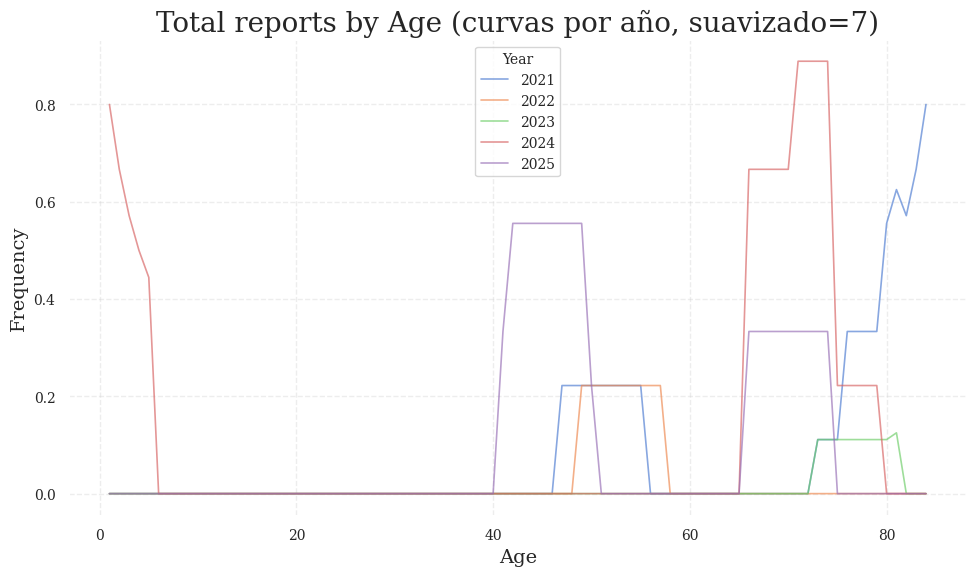

In [34]:

# =========================
# Uso rápido
# =========================
# 1) Subset (ajusta a gusto)
dsub = preparar_subset(
    reports_plus,
    #years=range(2016, 2025),  # o range(2021, 2026) si solo te interesan 2021–2025
     gen_in=["4/5 gen"],  # opcional
     gender="Male",                            # opcional
)

# 2) Pivot + suavizado (window=7 es un buen inicio; normalizar=True si quieres comparar formas)
piv = preparar_curvas_por_anio(dsub, window=9, normalizar=False)

# 3) Plot
plot_curvas_por_anio(piv, title="Total reports by Age (curvas por año, suavizado=7)")


C:\Users\narro\AppData\Local\Temp\ipykernel_11276\3960141071.py:50: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  piv = agg.pivot(values="count", index="AGE_Y", columns="YEAR").sort("AGE_Y")
C:\Users\narro\AppData\Local\Temp\ipykernel_11276\3960141071.py:63: DeprecationWarning: the argument `min_periods` for `Expr.rolling_mean` is deprecated. It was renamed to `min_samples` in version 1.21.0.
  pl.col(c).rolling_mean(window_size=window, center=True, min_periods=1).alias(c)


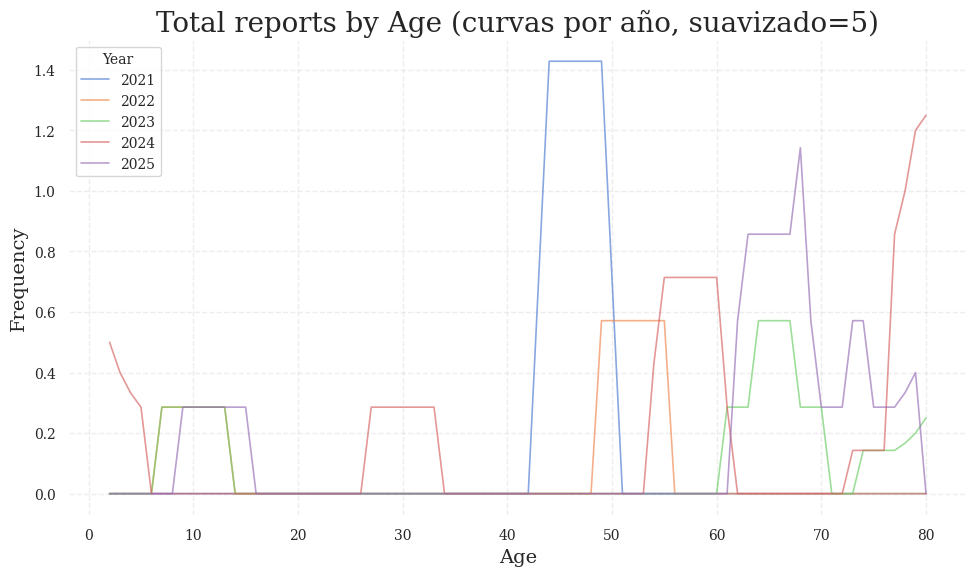

In [33]:

# =========================
# Uso rápido
# =========================
# 1) Subset (ajusta a gusto)
dsub = preparar_subset(
    reports_plus,
    #years=range(2016, 2025),  # o range(2021, 2026) si solo te interesan 2021–2025
     gen_in=["4/5 gen"],  # opcional
     gender="Female",                            # opcional
)

# 2) Pivot + suavizado (window=7 es un buen inicio; normalizar=True si quieres comparar formas)
piv = preparar_curvas_por_anio(dsub, window=7, normalizar=False)

# 3) Plot
plot_curvas_por_anio(piv, title="Total reports by Age (curvas por año, suavizado=5)")

In [35]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# 1) Preparar los datos
# =========================
def preparar_subset(
    df: pl.DataFrame,
    years: list[int] | range,
    gen_in: list[str] | None = None,
    gender: str | None = None,
) -> pl.DataFrame:
    d = df

    # Limpiar edades
    d = (
        d.with_columns(
            pl.col("AGE_Y")
              .cast(pl.Utf8)
              .str.extract(r"(\d+)", 1)
              .cast(pl.Int64, strict=False)
              .alias("AGE_Y")
        )
        .filter(pl.col("AGE_Y").is_not_null() & (pl.col("AGE_Y") >= 0) & (pl.col("AGE_Y") <= 120))
    )

    # Filtrar por año, generación, género (opcional)
    d = d.filter(pl.col("YEAR").is_in(list(years)))
    if gen_in is not None and "gen" in d.columns:
        d = d.filter(pl.col("gen").cast(pl.Utf8).str.to_lowercase().is_in([g.lower() for g in gen_in]))
    if gender is not None and "GENDER_ENG" in d.columns:
        d = d.filter(pl.col("GENDER_ENG").cast(pl.Utf8).str.to_lowercase() == gender.lower())

    return d


# =========================
# 2) Graficar histogramas + curva suavizada
# =========================
def plot_hist_y_curva(df: pl.DataFrame, years: list[int] | range, bins: int = 30, window: int = 7):
    plt.figure(figsize=(10, 6))
    palette = sns.color_palette("husl", len(list(years)))

    for i, year in enumerate(years):
        sub = df.filter(pl.col("YEAR") == year)
        if sub.is_empty():
            continue

        # Extraer edades
        ages = sub["AGE_Y"].to_numpy()

        # ---- Histograma ----
        counts, edges = np.histogram(ages, bins=bins, range=(0, 120))
        centers = 0.5 * (edges[1:] + edges[:-1])

        # ---- Suavizado (media móvil centrada) ----
        smooth = np.convolve(counts, np.ones(window) / window, mode="same")

        # Plot histograma con transparencia
        plt.bar(centers, counts, width=120/bins, color=palette[i], alpha=0.15, edgecolor="none")

        # Plot curva suavizada
        plt.plot(centers, smooth, color=palette[i], label=str(year), linewidth=2 if year in [2016, 2021, 2025] else 1.2)

    plt.xlabel("Edad")
    plt.ylabel("Frecuencia de reportes")
    plt.title("Distribución por edad con histograma y curva suavizada (por año)")
    plt.legend(title="Año")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()


# =========================


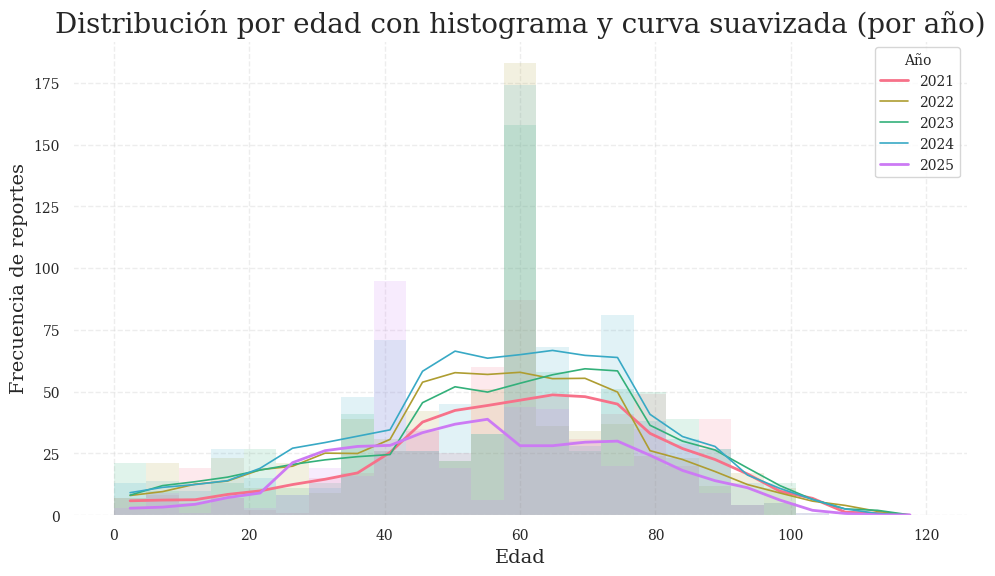

In [39]:
# 3) Ejemplo de uso
# =========================
years = range(2021, 2026)  # Ajusta el rango
df_filt = preparar_subset(reports_plus, years = years,
     gen_in=["2/3 gen"],  # opcional
     gender="Female",)
plot_hist_y_curva(df_filt, years=years, bins=25, window=7)


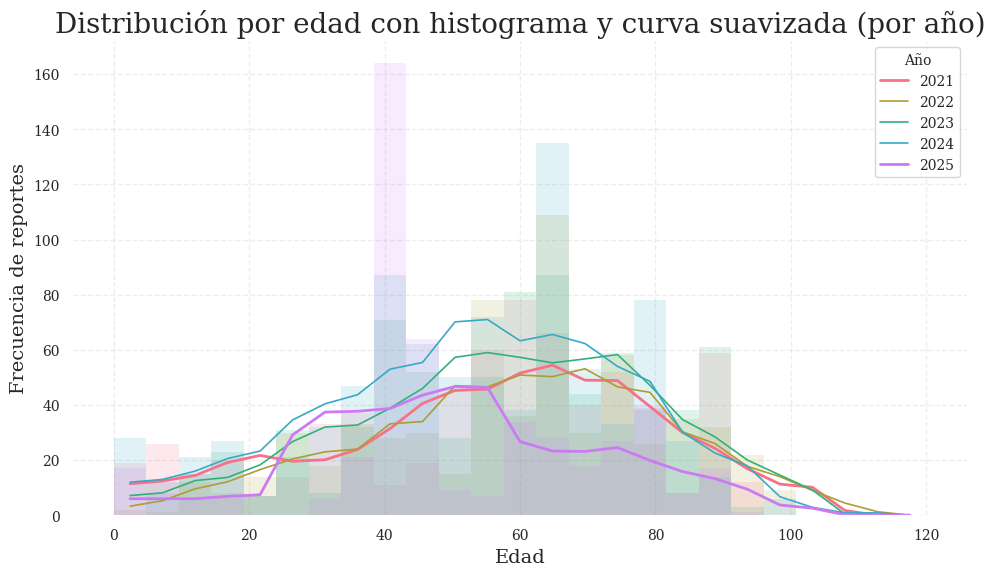

In [40]:
# 3) Ejemplo de uso
# =========================
years = range(2021, 2026)  # Ajusta el rango
df_filt = preparar_subset(reports_plus, years = years,
     gen_in=["1st gen"],  # opcional
     gender="Female",)
plot_hist_y_curva(df_filt, years=years, bins=25, window=7)

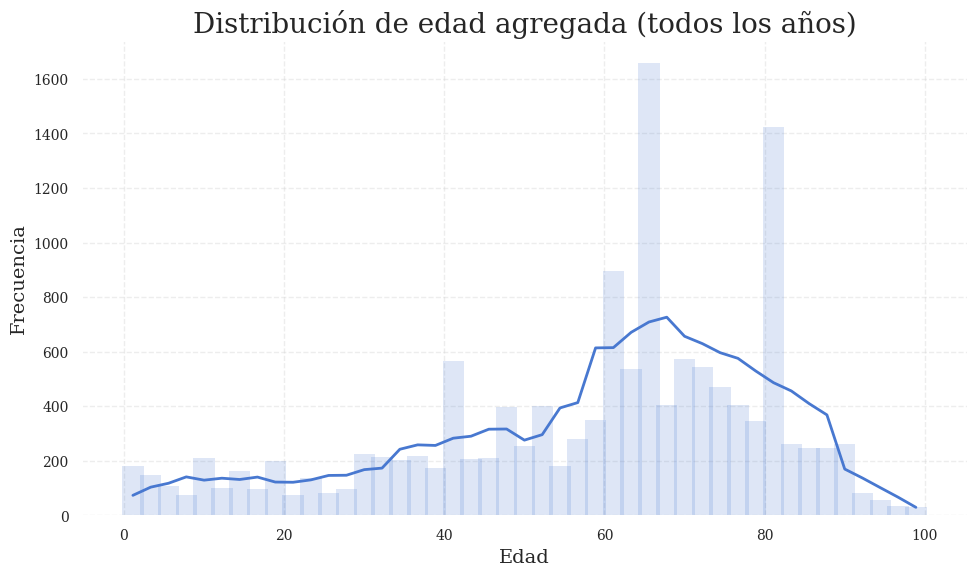

In [46]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

def preparar_total(
    df: pl.DataFrame,
    years: list[int] | range | None = None,   # opcional: filtra años
    gen_in: list[str] | None = None,          # opcional: ["1st gen","2/3 gen","4/5 gen"]
    gender: str | None = None                 # opcional: "Male" o "Female"
) -> np.ndarray:
    d = df

    # Asegurar AGE_Y limpia (0-120)
    d = (
        d.with_columns(
            pl.col("AGE_Y").cast(pl.Utf8).str.extract(r"(\d+)", 1).cast(pl.Int64, strict=False).alias("AGE_Y")
        )
        .filter(pl.col("AGE_Y").is_not_null() & (pl.col("AGE_Y") >= 0) & (pl.col("AGE_Y") <= 100))
    )

    if years is not None:
        d = d.filter(pl.col("YEAR").is_in(list(years)))
    if gen_in is not None and "gen" in d.columns:
        d = d.filter(pl.col("gen").cast(pl.Utf8).str.to_lowercase().is_in([g.lower() for g in gen_in]))
    if gender is not None and "GENDER_ENG" in d.columns:
        d = d.filter(pl.col("GENDER_ENG").cast(pl.Utf8).str.to_lowercase() == gender.lower())

    return d["AGE_Y"].to_numpy()

def plot_hist_curva_total(
    df: pl.DataFrame,
    years: list[int] | range | None = None,
    gen_in: list[str] | None = None,
    gender: str | None = None,
    bins: int = 60,               # más bins si quieres más detalle
    window: int = 7,              # suavizado media móvil (impar: 5/7/9)
    normalize: bool = False       # True para mostrar proporción en vez de conteos
):
    ages = preparar_total(df, years=years, gen_in=gen_in, gender=gender)
    if ages.size == 0:
        raise ValueError("No hay datos después de aplicar filtros.")

    # Histograma agregado
    counts, edges = np.histogram(ages, bins=bins, range=(0, 100))
    centers = 0.5 * (edges[1:] + edges[:-1])

    # Normalizar (opcional)
    y_hist = counts.astype(float)
    if normalize:
        total = y_hist.sum()
        y_hist = y_hist / total if total > 0 else y_hist

    # Curva suavizada (media móvil centrada)
    k = max(1, int(window))
    kernel = np.ones(k) / k
    y_smooth = np.convolve(y_hist, kernel, mode="same")

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(centers, y_hist, width=120/bins, alpha=0.18, edgecolor="none")
    plt.plot(centers, y_smooth, linewidth=2)
    plt.xlabel("Edad")
    plt.ylabel("Proporción" if normalize else "Frecuencia")
    plt.title("Distribución de edad agregada (todos los años)")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()

# ===== Ejemplos =====
# Todo agregado (todos los años)
plot_hist_curva_total(reports_plus, bins=45, window=7, normalize=False)


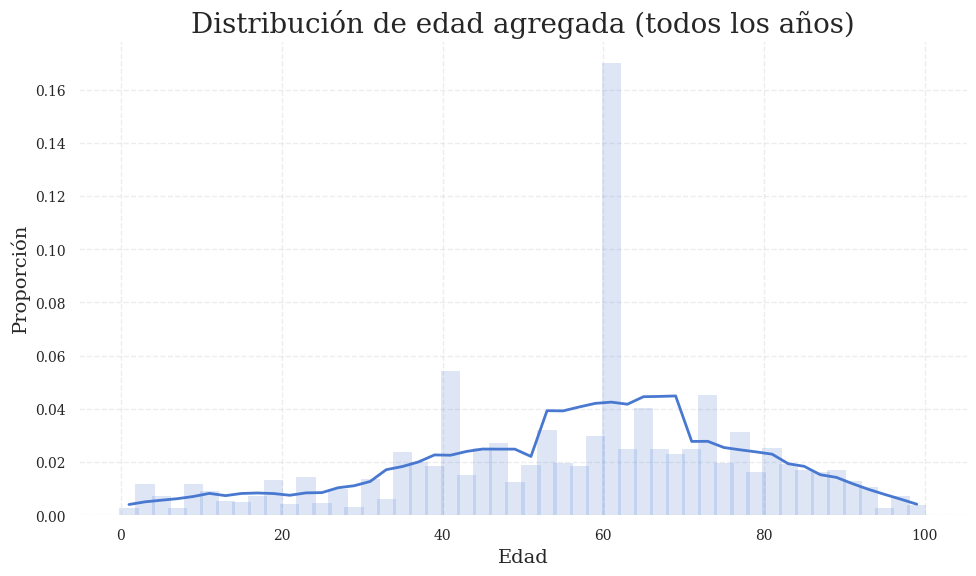

In [47]:

# Solo 2021–2025 y, si quieres, una generación o género:
plot_hist_curva_total(reports_plus, years=range(2021, 2026), gen_in=["2/3 gen"], gender="Female", bins=50, window=9, normalize=True)


# Canada Census

In [49]:
import polars as pl
canada2016 = pl.read_parquet("data/processed/canada_census_2016.parquet")
canada2021 = pl.read_parquet("data/processed/canada_census_2021.parquet")

In [50]:
# drop Geo, and last column
canada2016 = canada2016.drop(["Geo", canada2016.columns[-1]])
canada2021 = canada2021.drop(["Geo", canada2021.columns[-1]])

In [51]:
canada2021

Reference Period,Census Year,Age,Total,Men,Women
i64,i64,i64,f64,f64,f64
2021,2021,1,355385.0,181860.0,173525.0
2021,2021,2,365325.0,186860.0,178465.0
2021,2021,3,377035.0,193235.0,183800.0
2021,2021,4,390315.0,200445.0,189870.0
2021,2021,5,402100.0,205950.0,196155.0
…,…,…,…,…,…
2021,2021,95,25450.0,7240.0,18205.0
2021,2021,96,16320.0,4250.0,12070.0
2021,2021,97,12125.0,2940.0,9185.0


In [52]:
import math

# make an exponential interpolation 

# Reference Period	Census Year	Age	Total	Men	Women
# i64	i64	i64	f64	f64	f64
# 2021	2021	1	355385.0	181860.0	173525.0
# 2021	2021	2	365325.0	186860.0	178465.0
# 2021	2021	3	377035.0	193235.0	183800.0
# 2021	2021	4	390315.0	200445.0	189870.0

ages = canada2016.select("Age").to_series().to_list()
total_2016 = canada2016.select("Total").to_series().to_list()
total_2021 = canada2021.select("Total").to_series().to_list()   
men_2016 = canada2016.select("Men").to_series().to_list()
men_2021 = canada2021.select("Men").to_series().to_list()
women_2016 = canada2016.select("Women").to_series().to_list()
women_2021 = canada2021.select("Women").to_series().to_list()
total_interp = []
men_interp = []
women_interp = []
for i in range(len(ages)):
    age = ages[i]
    t2016 = total_2016[i]
    t2021 = total_2021[i]
    m2016 = men_2016[i]
    m2021 = men_2021[i]
    w2016 = women_2016[i]
    w2021 = women_2021[i]
    # Calculate exponential growth rates
    if t2016 > 0 and t2021 > 0:
        r_total = math.log(t2021 / t2016) / 5
    else:
        r_total = 0
    if m2016 > 0 and m2021 > 0:
        r_men = math.log(m2021 / m2016) / 5
    else:
        r_men = 0
    if w2016 > 0 and w2021 > 0:
        r_women = math.log(w2021 / w2016) / 5
    else:
        r_women = 0
    for year in range(2016, 2025):
        total_value = t2016 * math.exp(r_total * (year - 2016))
        men_value = m2016 * math.exp(r_men * (year - 2016))
        women_value = w2016 * math.exp(r_women * (year - 2016))
        total_interp.append((year, age, total_value))
        men_interp.append((year, age, men_value))
        women_interp.append((year, age, women_value))
canada_interp_total = pl.DataFrame(total_interp, schema=["Census Year", "Age", "Total"])
canada_interp_men = pl.DataFrame(men_interp, schema=["Census Year", "Age", "Men"])
canada_interp_women = pl.DataFrame(women_interp, schema=["Census Year", "Age", "Women"])


C:\Users\narro\AppData\Local\Temp\ipykernel_11276\3978587086.py:50: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  canada_interp_total = pl.DataFrame(total_interp, schema=["Census Year", "Age", "Total"])
C:\Users\narro\AppData\Local\Temp\ipykernel_11276\3978587086.py:51: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  canada_interp_men = pl.DataFrame(men_interp, schema=["Census Year", "Age", "Men"])
C:\Users\narro\AppData\Local\Temp\ipykernel_11276\3978587086.py:52: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  canada_interp_women = pl.DataFrame(women_interp, schema=["Census Year", "Age", "Women"])


In [53]:
canada_interp_total

Census Year,Age,Total
i64,i64,f64
2016,1,372615.0
2017,1,369103.434027
2018,1,365624.96145
2019,1,362179.270392
2020,1,358766.051917
…,…,…
2020,99,5617.91411
2021,99,5940.0
2022,99,6280.551697


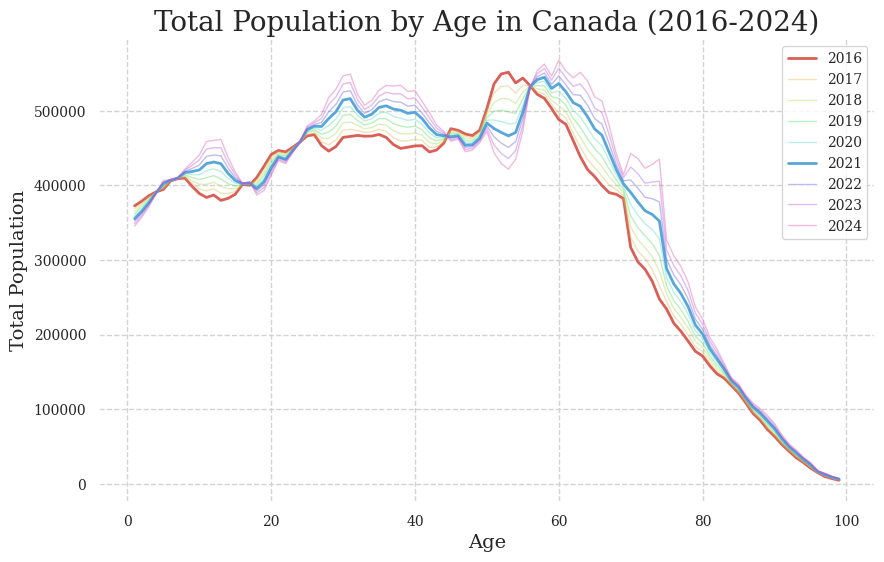

In [62]:
# plot the interpolated total population by age for years 2016 to 2024
# use palette hls from seaborn
palette = sns.color_palette("hls", 9)

plt.figure(figsize=(10, 6))
for year in range(2016, 2025):  
    if year == 2016 or year == 2021:
        alpha = 1.0
    else:
        alpha = 0.4
    data_year = canada_interp_total.filter(pl.col("Census Year") == year)
    ages = data_year.select("Age").to_series().to_list()
    totals = data_year.select("Total").to_series().to_list()
    plt.plot(ages, totals, label=str(year), alpha=alpha, color=palette[year - 2016], linewidth=2 if year in [2016, 2021] else 1)
plt.xlabel("Age")
plt.ylabel("Total Population")
plt.title("Total Population by Age in Canada (2016-2024)")
plt.legend()
plt.savefig('visualizations/canada/01_06.pdf', bbox_inches='tight')
plt.show()

2021
2022
2023
2024


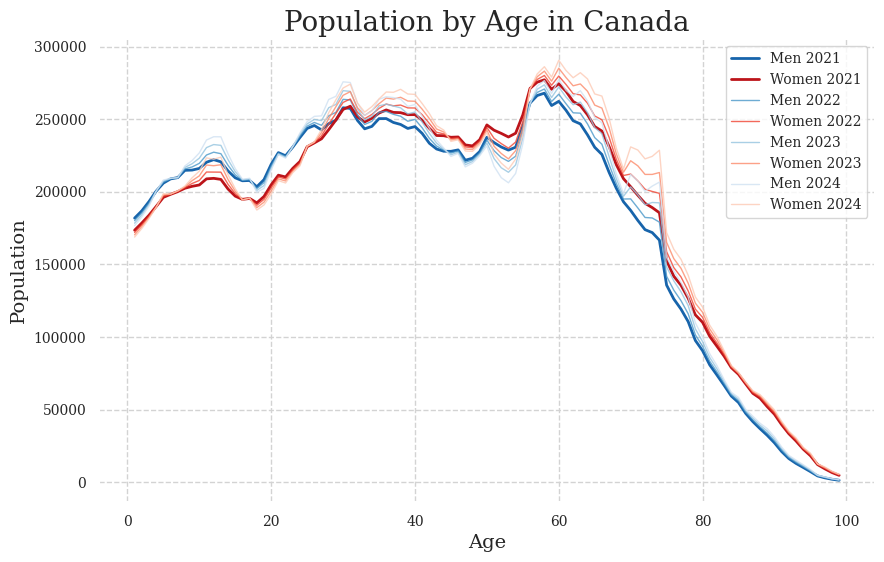

In [63]:
# plot the interpolated total population by age for years 2016 to 2024
# use blue palette for men and red palette for women
men_palette = sns.color_palette("Blues_r", 4)
women_palette = sns.color_palette("Reds_r", 4)

plt.figure(figsize=(10, 6))
for year in range(2021, 2025):  
    print(year)
    if year == 2021:
        alpha = 1
        linewidth = 2
    else:
        alpha = 0.8
        linewidth = 1
    data_year = canada_interp_men.filter(pl.col("Census Year") == year)
    ages = data_year.select("Age").to_series().to_list()
    totals = data_year.select("Men").to_series().to_list()
    plt.plot(ages, totals, label=f"Men {year}", alpha=alpha, color=men_palette[year - 2021], linewidth=linewidth)
    data_year_women = canada_interp_women.filter(pl.col("Census Year") == year)
    ages_women = data_year_women.select("Age").to_series().to_list()
    totals_women = data_year_women.select("Women").to_series().to_list()
    plt.plot(ages_women, totals_women, label=f"Women {year}", alpha=alpha, color=women_palette[year - 2021], linewidth=linewidth)
plt.xlabel("Age")
plt.ylabel("Population")
plt.title("Population by Age in Canada")
plt.legend()
plt.savefig('visualizations/canada/01_08.pdf', bbox_inches='tight')
plt.show()

In [105]:
canada_interp_total.write_parquet("data/pred_data/canada_interp_total.parquet")

# Prescriptions 

In [64]:
import pandas as pd
cefs = pd.read_csv("data/processed/cephalosporins_canada.csv")
cefs

,Antimicrobial_Class,Year,Canada_DDD,Canada_Prescriptions
0,1st gen cephalosporins,2021,1529.37,210.75
1,1st gen cephalosporins,2022,1499.57,209.04
2,1st gen cephalosporins,2023,1538.61,219.01
3,1st gen cephalosporins,2024,1556.29,224.33
4,2/3rd gen cephalosporins,2021,493.13,58.05
5,2/3rd gen cephalosporins,2022,584.43,71.05
6,2/3rd gen cephalosporins,2023,691.32,82.87
7,2/3rd gen cephalosporins,2024,683.02,81.60
8,4/5th gen cephalosporins,2021,0.21,0.04
9,4/5th gen cephalosporins,2022,0.26,0.04


In [65]:
total_population_per_year = {}
for year in range(2021, 2025):
    total_population = canada_interp_total.filter(pl.col("Census Year") == year).select(pl.col("Total").sum()).to_series()[0]
    total_population_per_year[year] = total_population

total_population_per_year = pl.DataFrame({
    "Year": list(range(2021, 2025)),
    "Total_Population": [total_population_per_year[year] for year in range(2021, 2025)]
})
total_population_per_year


Year,Total_Population
i64,f64
2021,3.6639335e7
2022,3.7061e7
2023,3.7500e7
2024,3.7957e7


In [66]:
# 1) Polars -> pandas
pop_df = (
    total_population_per_year
      .to_pandas()                       # columnas: ['Year','Total_Population']
      .astype({'Year': 'int64'})
)

# 2) Asegura que cefs.Year también sea int
cefs = cefs.astype({'Year': 'int64'})

# 3) Merge correcto (left)
cefs_tp = pd.merge(cefs, pop_df, on='Year', how='left')


In [67]:
# get the total prescriptions = cefs['Canada_Prescriptions']*1000 *population that year
cefs_tp['Total_Prescriptions']= cefs_tp['Canada_Prescriptions']*1000 * cefs_tp['Total_Population']
cefs_tp

,Antimicrobial_Class,Year,Canada_DDD,Canada_Prescriptions,Total_Population,Total_Prescriptions
0,1st gen cephalosporins,2021,1529.37,210.75,3.663934e+07,7.721740e+12
1,1st gen cephalosporins,2022,1499.57,209.04,3.706111e+07,7.747255e+12
2,1st gen cephalosporins,2023,1538.61,219.01,3.750027e+07,8.212935e+12
3,1st gen cephalosporins,2024,1556.29,224.33,3.795738e+07,8.514979e+12
4,2/3rd gen cephalosporins,2021,493.13,58.05,3.663934e+07,2.126913e+12
5,2/3rd gen cephalosporins,2022,584.43,71.05,3.706111e+07,2.633192e+12
6,2/3rd gen cephalosporins,2023,691.32,82.87,3.750027e+07,3.107648e+12
7,2/3rd gen cephalosporins,2024,683.02,81.60,3.795738e+07,3.097322e+12
8,4/5th gen cephalosporins,2021,0.21,0.04,3.663934e+07,1.465573e+09
9,4/5th gen cephalosporins,2022,0.26,0.04,3.706111e+07,1.482444e+09


In [109]:
reports_plus

ACTIVE_INGREDIENT_NAME,REPORT_ID,DATRECEIVED,GENDER_ENG,AGE_Y,WEIGHT_KG,HEIGHT_CM,YEAR,gen
str,i64,datetime[ns],str,str,f64,f64,i32,str
"""cefuroxime""",310510,2025-06-30 00:00:00,"""Male""","""49""",113.38,null,2025,"""2/3 gen"""
"""cefuroxime salt not specified""",310510,2025-06-30 00:00:00,"""Male""","""49""",113.38,null,2025,"""2/3 gen"""
"""cefcapene pivoxil hydrochlorid…",332054,2022-03-30 00:00:00,"""Male""","""73""",null,null,2022,"""2/3 gen"""
"""cefcapene pivoxil""",332054,2022-03-30 00:00:00,"""Male""","""73""",null,null,2022,"""2/3 gen"""
"""cefcapene""",332054,2022-03-30 00:00:00,"""Male""","""73""",null,null,2022,"""2/3 gen"""
…,…,…,…,…,…,…,…,…
"""methylol cefalexin lysinate""",908149644,2025-06-30 00:00:00,"""Male""","""91""",null,null,2025,"""1st gen"""
"""cefalexin""",908149644,2025-06-30 00:00:00,"""Male""","""91""",null,null,2025,"""1st gen"""
"""cefalexin sodium""",908149644,2025-06-30 00:00:00,"""Male""","""91""",null,null,2025,"""1st gen"""


In [68]:
# transpose cefs
cefs_transposed = cefs.set_index('Year').T.reset_index()
cefs_transposed

Year,index,2021,2022,2023,2024,2021,2022,2023,2024,2021,2022,2023,2024
0,Antimicrobial_Class,1st gen cephalosporins,1st gen cephalosporins,1st gen cephalosporins,1st gen cephalosporins,2/3rd gen cephalosporins,2/3rd gen cephalosporins,2/3rd gen cephalosporins,2/3rd gen cephalosporins,4/5th gen cephalosporins,4/5th gen cephalosporins,4/5th gen cephalosporins,4/5th gen cephalosporins
1,Canada_DDD,1529.37,1499.57,1538.61,1556.29,493.13,584.43,691.32,683.02,0.21,0.26,0.49,0.51
2,Canada_Prescriptions,210.75,209.04,219.01,224.33,58.05,71.05,82.87,81.6,0.04,0.04,0.07,0.08


# Juntar

primero genrar una distribución poblacional unificadad de los datos que tenemos 

In [54]:
import polars as pl

# df original
df = canada_interp_total

# promedio de población por edad en todos los años
pop_promedio = (
    df.group_by("Age")
      .agg(pl.col("Total").mean().alias("TotalPop_avg"))
      .sort("Age")
)

# normaliza para obtener proporción poblacional
pop_promedio = pop_promedio.with_columns(
    (pl.col("TotalPop_avg") / pl.col("TotalPop_avg").sum()).alias("P_pob")
)

pop_promedio.head()


Age,TotalPop_avg,P_pob
i64,f64,f64
1,358873.282428,0.009889
2,368061.766706,0.010143
3,378879.571362,0.010441
4,390525.150203,0.010762
5,400593.761059,0.011039


primero en genral de cefalosporinas luego hago las especificas 

| Columna         | Tipo  | Significado                                                                                                               |
| --------------- | ----- | ------------------------------------------------------------------------------------------------------------------------- |
| **Age**         | int   | Edad (1–100). Unidad base de comparación con la distribución poblacional.                                                 |
| **EA_count**    | float | Conteo bruto de efectos adversos (sin normalizar) observados en ese rango de edad.                                        |
| **EA_smooth**   | float | Conteo suavizado mediante media móvil de ventana definida (`window=7`), reduce ruido entre edades adyacentes.             |
| **P_EA**        | float | Proporción de efectos adversos en esa edad respecto al total (`EA_count / ΣEA_count`). Suma ≈ 1.                          |
| **P_EA_smooth** | float | Versión suavizada y normalizada de `EA_smooth`, usada como estimador continuo de la probabilidad relativa de EA por edad. |



Imaginá que tenés una lista de valores ordenados por tiempo —por ejemplo, las ventas diarias o el número de casos por año—.
En lugar de calcular el promedio de todos los datos, querés ver cómo cambia el promedio a lo largo del tiempo.
Entonces tomás una “ventana” (por ejemplo, de 3 días), calculás el promedio de esos 3 valores, luego movés la ventana un paso (al siguiente día) y repetís.

In [106]:
reports_plus.write_parquet("data/pred_data/reports_plus.parquet")

In [59]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

def preparar_total(df: pl.DataFrame, years=None, gen_in=None, gender=None) -> np.ndarray:
    d = (
        df.with_columns(
            pl.col("AGE_Y")
            .cast(pl.Utf8)
            .str.extract(r"(\d+)", 1)
            .cast(pl.Int64, strict=False)
            .alias("AGE_Y")
        )
        .filter(pl.col("AGE_Y").is_not_null() & (pl.col("AGE_Y") >= 0) & (pl.col("AGE_Y") <= 100))
    )

    if years is not None:
        d = d.filter(pl.col("YEAR").is_in(list(years)))
    if gen_in is not None and "gen" in d.columns:
        d = d.filter(pl.col("gen").cast(pl.Utf8).str.to_lowercase().is_in([g.lower() for g in gen_in]))
    if gender is not None and "GENDER_ENG" in d.columns:
        d = d.filter(pl.col("GENDER_ENG").cast(pl.Utf8).str.to_lowercase() == gender.lower())

    return d["AGE_Y"].to_numpy()

def build_df_curva_total(
    df: pl.DataFrame,
    years=None,
    gen_in=None,
    gender=None,
    bins=60,
    window=7
) -> pl.DataFrame:
    """Devuelve un DataFrame con la distribución de EA por edad (bruta y suavizada)."""
    ages = preparar_total(df, years=years, gen_in=gen_in, gender=gender)
    if ages.size == 0:
        raise ValueError("No hay datos después de aplicar filtros.")

    # Histograma con bins de 1 año, de 0 a 100
    bins = np.arange(0, 101, 1)  # límites: 0–1, 1–2, ..., 99–100
    counts, edges = np.histogram(ages, bins=bins)

    # Centros: 1, 2, ..., 100 (edad al extremo superior del bin)
    centers = np.arange(1, 101)  # 100 valores enteros de 1 a 100
    y_hist = counts.astype(float)

    # Suavizado con media móvil
    kernel = np.ones(window) / window
    y_smooth = np.convolve(y_hist, kernel, mode="same")

    # Normalizaciones
    total = y_hist.sum()
    y_prop = y_hist / total if total > 0 else y_hist
    smooth_prop = y_smooth / y_smooth.sum() if y_smooth.sum() > 0 else y_smooth

    # Crear DataFrame Polars
    df_out = pl.DataFrame({
        "Age": centers,
        "EA_count": y_hist,
        "EA_smooth": y_smooth,
        "P_EA": y_prop,
        "P_EA_smooth": smooth_prop
    })

    return df_out

# Ejemplo de uso:
df_ea = build_df_curva_total(reports_plus, bins=45, window=7)
df_ea


Age,EA_count,EA_smooth,P_EA,P_EA_smooth
i64,f64,f64,f64,f64
1,0.0,35.714286,0.0,0.002556
2,79.0,47.142857,0.005634,0.003374
3,103.0,54.428571,0.007346,0.003896
4,68.0,62.571429,0.00485,0.004478
5,80.0,63.714286,0.005705,0.00456
…,…,…,…,…
96,16.0,27.142857,0.001141,0.001943
97,20.0,24.857143,0.001426,0.001779
98,15.0,17.428571,0.00107,0.001247


In [72]:
df_ea = df_ea.with_columns([
    (pl.col("EA_count") * 20).alias("EA_estimated"),
    (pl.col("EA_smooth") * 20).alias("EA_estimated_smooth")
])


Esto para poder despues tomar en cuenta los de que solo el 5% son reportados 

In [73]:
df_ea

Age,EA_count,EA_smooth,P_EA,P_EA_smooth,EA_estimated,EA_estimated_smooth
i64,f64,f64,f64,f64,f64,f64
1,0.0,35.714286,0.0,0.002556,0.0,714.285714
2,79.0,47.142857,0.005634,0.003374,1580.0,942.857143
3,103.0,54.428571,0.007346,0.003896,2060.0,1088.571429
4,68.0,62.571429,0.00485,0.004478,1360.0,1251.428571
5,80.0,63.714286,0.005705,0.00456,1600.0,1274.285714
…,…,…,…,…,…,…
96,16.0,27.142857,0.001141,0.001943,320.0,542.857143
97,20.0,24.857143,0.001426,0.001779,400.0,497.142857
98,15.0,17.428571,0.00107,0.001247,300.0,348.571429


In [60]:
# Unir ambas tablas por la columna 'Age'
df_merged = (
    pop_promedio.join(df_ea, on="Age", how="inner")
    .with_columns([
        # ratio relativo: exceso o déficit de EA respecto a la población
        (pl.col("P_EA_smooth") / pl.col("P_pob")).alias("EA_to_Pop_Ratio"),
        # diferencia simple (útil para visualización)
        (pl.col("P_EA_smooth") - pl.col("P_pob")).alias("EA_minus_Pop")
    ])
    .sort("Age")
)

df_merged.head()

Age,TotalPop_avg,P_pob,EA_count,EA_smooth,P_EA,P_EA_smooth,EA_to_Pop_Ratio,EA_minus_Pop
i64,f64,f64,f64,f64,f64,f64,f64,f64
1,358873.282428,0.009889,0.0,35.714286,0.0,0.002556,0.258472,-0.007333
2,368061.766706,0.010143,79.0,47.142857,0.005634,0.003374,0.332665,-0.006768
3,378879.571362,0.010441,103.0,54.428571,0.007346,0.003896,0.373111,-0.006545
4,390525.150203,0.010762,68.0,62.571429,0.00485,0.004478,0.41614,-0.006283
5,400593.761059,0.011039,80.0,63.714286,0.005705,0.00456,0.41309,-0.006479


Por tanto, si quieres una tasa general de exposición para “todas las generaciones”,
primero debes sumar dentro del mismo año (para combinar todas las generaciones),
y después sacar el promedio de esos totales anuales (para representar el periodo multianual).

Así el número final refleja:

“Prescripciones promedio por mil habitantes, por año, considerando todas las generaciones.”

y estará perfectamente alineado con tu población promedio (que también es multianual promedio).

In [108]:
cefs_pl

Antimicrobial_Class,Year,Canada_DDD,Canada_Prescriptions
str,i64,f64,f64
"""1st gen cephalosporins""",2021,1529.37,210.75
"""1st gen cephalosporins""",2022,1499.57,209.04
"""1st gen cephalosporins""",2023,1538.61,219.01
"""1st gen cephalosporins""",2024,1556.29,224.33
"""2/3rd gen cephalosporins""",2021,493.13,58.05
…,…,…,…
"""2/3rd gen cephalosporins""",2024,683.02,81.6
"""4/5th gen cephalosporins""",2021,0.21,0.04
"""4/5th gen cephalosporins""",2022,0.26,0.04


In [69]:
import polars as pl

# Convertir a Polars si aún no lo hiciste
cefs_pl = pl.from_pandas(cefs)

# 1️⃣ Sumar todas las generaciones por año
presc_anual = (
    cefs_pl
    .group_by("Year")
    .agg(pl.col("Canada_Prescriptions").sum().alias("Presc_total_year"))
    .sort("Year")
)

# 2️⃣ Calcular el promedio de esas sumas anuales
presc_general = presc_anual["Presc_total_year"].mean()
print(f"Promedio general de prescripciones por mil hab: {presc_general:.2f}")


Promedio general de prescripciones por mil hab: 289.23


In [107]:
cefs_pl.write_parquet("data/pred_data/cefs.parquet")

In [74]:
float(df_merged["P_pob"].sum()), float(df_merged["P_EA_smooth"].sum())


(1.0000000000000002, 0.9993354122999846)

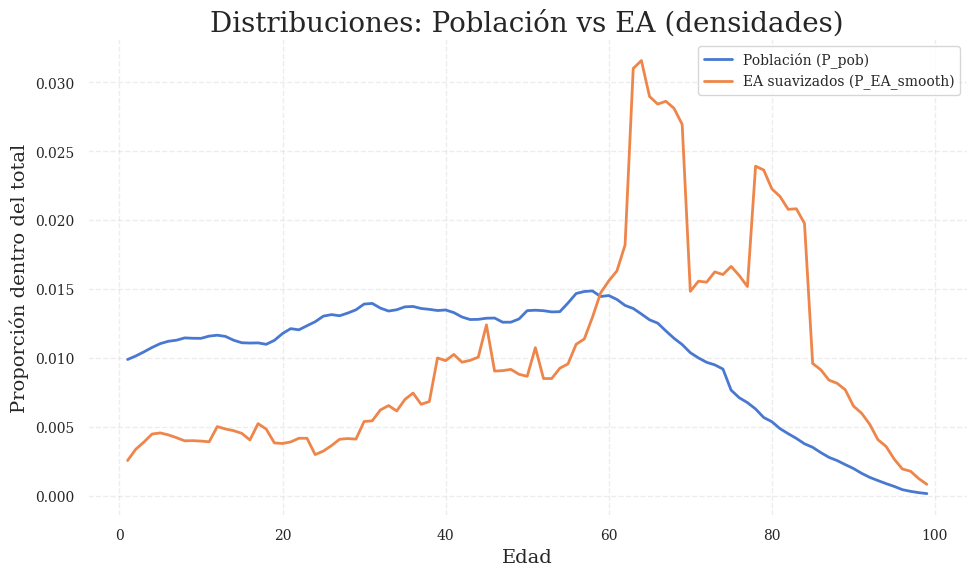

In [75]:
import matplotlib.pyplot as plt
from pathlib import Path

ages  = df_merged["Age"].to_numpy()
p_pop = df_merged["P_pob"].to_numpy()
p_ea  = df_merged["P_EA_smooth"].to_numpy()

plt.figure(figsize=(10,6))
plt.plot(ages, p_pop, linewidth=2, label="Población (P_pob)")
plt.plot(ages, p_ea,  linewidth=2, label="EA suavizados (P_EA_smooth)")
plt.xlabel("Edad")
plt.ylabel("Proporción dentro del total")
plt.title("Distribuciones: Población vs EA (densidades)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()

Path("visualizations").mkdir(parents=True, exist_ok=True)
plt.savefig("visualizations/comp_densidades_pob_vs_ea.png", bbox_inches="tight")
plt.show()


“Las curvas de densidad muestran un claro desplazamiento de los EA hacia edades avanzadas, lo que indica que los reportes de efectos adversos se concentran en adultos mayores.
Si la exposición a cefalosporinas fuera uniforme, esto implicaría que la edad es un factor de riesgo importante para desarrollar reacciones adversas.
Sin embargo, dado que el uso clínico de antibióticos suele concentrarse en estos grupos, el patrón también podría reflejar una mayor exposición terapéutica.”

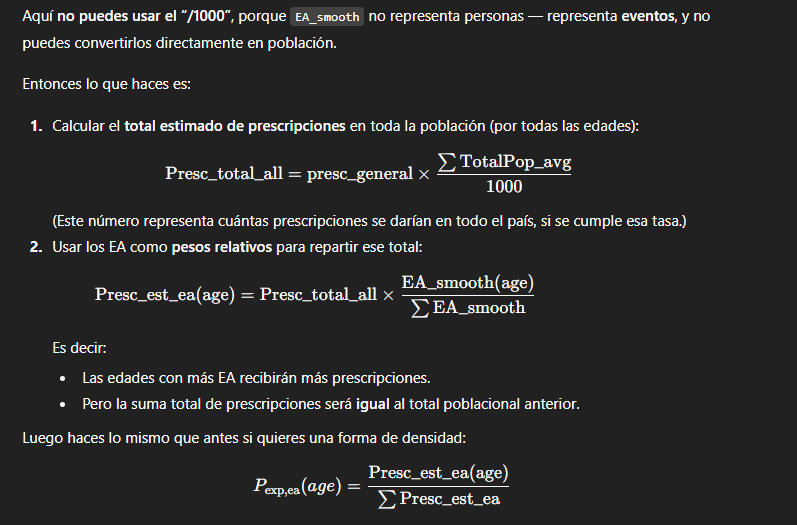

In [88]:
import polars as pl

presc_general = 289.23  # prescripciones por mil hab (promedio anual)

# 1) Exposición proporcional a la población
df_expos = df_merged.with_columns(
    (pl.lit(presc_general) * pl.col("TotalPop_avg") / 1000).alias("Presc_est_pob")
)
sum_p_pob = float(df_expos["Presc_est_pob"].sum())
df_expos = df_expos.with_columns(
    (pl.col("Presc_est_pob") / sum_p_pob).alias("P_exp_pob")  # densidad (suma=1)
)

# 2) Exposición proporcional a la distribución de EA
#    Total de prescripciones del periodo (sobre toda la población)
total_pop = float(df_expos["TotalPop_avg"].sum())
presc_total_all = presc_general * (total_pop / 1000.0)

#    (a) Usando P_EA_smooth directamente como pesos (ya suma ~1)
df_expos = df_expos.with_columns(
    (pl.lit(presc_total_all) * pl.col("P_EA_smooth")).alias("Presc_est_ea")
)

#    (b) Si prefieres usar EA_smooth bruto: normaliza primero
sum_ea_smooth = float(df_expos["EA_smooth"].sum())
df_expos = df_expos.with_columns(
    (pl.lit(presc_total_all) * (pl.col("EA_smooth") / sum_ea_smooth)).alias("Presc_est_ea_from_counts")
)

# Densidad de exposición ~ EA (suma=1)
sum_p_ea = float(df_expos["Presc_est_ea"].sum())
df_expos = df_expos.with_columns(
    (pl.col("Presc_est_ea") / sum_p_ea).alias("P_exp_ea")
).sort("Age")

# Chequeo (ambas deben ≈ 1.0)
print("sum P_exp_pob:", float(df_expos["P_exp_pob"].sum()))
print("sum P_exp_ea :", float(df_expos["P_exp_ea"].sum()))


sum P_exp_pob: 0.9999999999999997
sum P_exp_ea : 1.0


In [89]:
df_expos

Age,TotalPop_avg,P_pob,EA_count,EA_smooth,P_EA,P_EA_smooth,EA_to_Pop_Ratio,EA_minus_Pop,Presc_est_pob,P_exp_pob,Presc_est_ea,Presc_est_ea_from_counts,P_exp_ea
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,358873.282428,0.009889,0.0,35.714286,0.0,0.002556,0.258472,-0.007333,103796.919477,0.009889,26828.584293,26846.426098,0.002558
2,368061.766706,0.010143,79.0,47.142857,0.005634,0.003374,0.332665,-0.006768,106454.504784,0.010143,35413.731267,35437.282449,0.003376
3,378879.571362,0.010441,103.0,54.428571,0.007346,0.003896,0.373111,-0.006545,109583.338425,0.010441,40886.762462,40913.953373,0.003898
4,390525.150203,0.010762,68.0,62.571429,0.00485,0.004478,0.41614,-0.006283,112951.589193,0.010762,47003.679681,47034.938523,0.004481
5,400593.761059,0.011039,80.0,63.714286,0.005705,0.00456,0.41309,-0.006479,115863.733511,0.011039,47862.194379,47894.024158,0.004563
…,…,…,…,…,…,…,…,…,…,…,…,…,…
95,24607.604231,0.000678,41.0,37.142857,0.002924,0.002658,3.920292,0.00198,7117.257372,0.000678,27901.727665,27920.283141,0.00266
96,16034.771849,0.000442,16.0,27.142857,0.001141,0.001943,4.396481,0.001501,4637.737062,0.000442,20389.724063,20403.283834,0.001944
97,11636.939522,0.000321,20.0,24.857143,0.001426,0.001779,5.547852,0.001458,3365.752018,0.000321,18672.694668,18685.112564,0.00178


sum P_pob     : 1.0000000000000002
sum P_EA_smooth: 0.9993354122999846
sum P_exp_pob : 0.9999999999999996
sum P_exp_ea  : 1.0


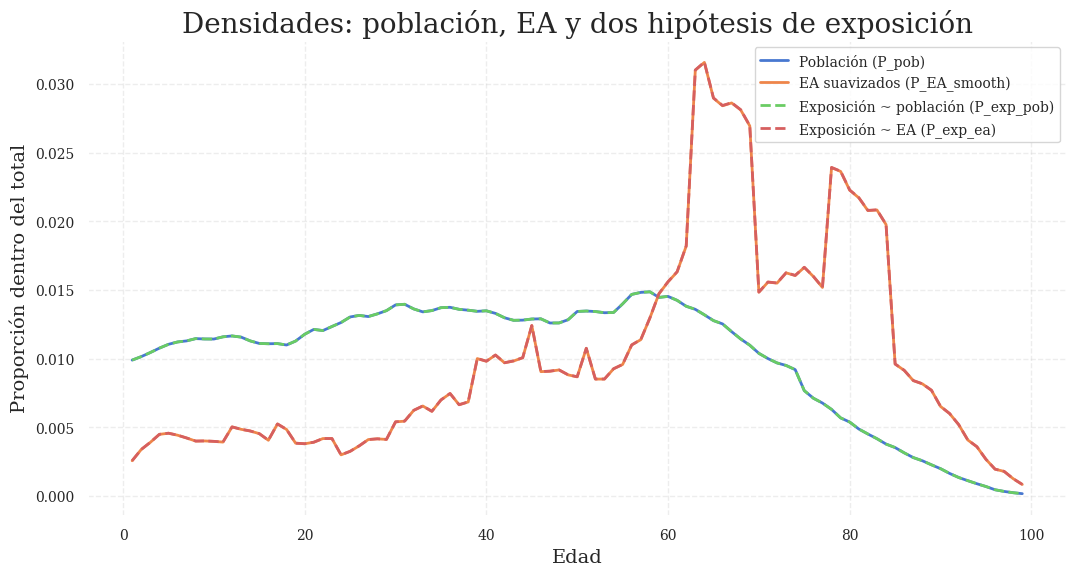

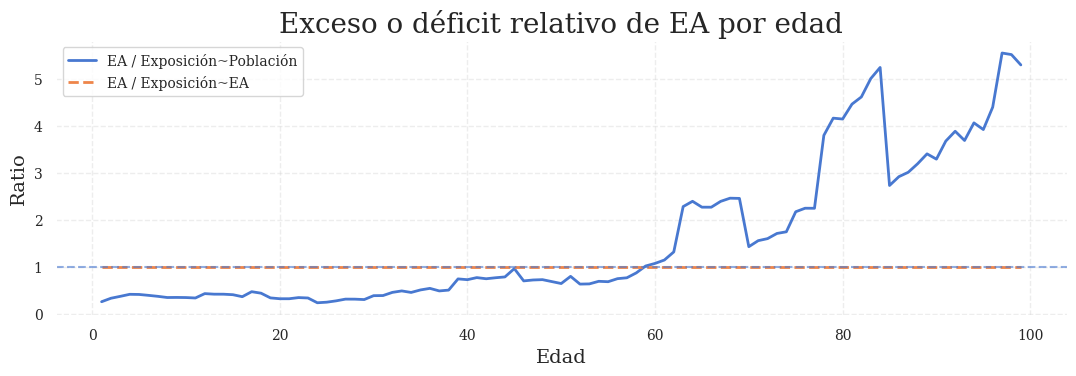

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# --- prepara arrays desde df_expos ---
ages      = df_expos["Age"].to_numpy()
p_pob     = df_expos["P_pob"].to_numpy()
p_ea      = df_expos["P_EA_smooth"].to_numpy()
p_exp_pob = df_expos["P_exp_pob"].to_numpy()
p_exp_ea  = df_expos["P_exp_ea"].to_numpy()

# (opcional) chequeos rápidos deberían ≈ 1.0
print("sum P_pob     :", float(np.sum(p_pob)))
print("sum P_EA_smooth:", float(np.sum(p_ea)))
print("sum P_exp_pob :", float(np.sum(p_exp_pob)))
print("sum P_exp_ea  :", float(np.sum(p_exp_ea)))

# --- FIGURA 1: cuatro densidades superpuestas ---
plt.figure(figsize=(11,6))
plt.plot(ages, p_pob,     linewidth=2, label="Población (P_pob)")
plt.plot(ages, p_ea,      linewidth=2, label="EA suavizados (P_EA_smooth)")
plt.plot(ages, p_exp_pob, linewidth=2, linestyle="--", label="Exposición ~ población (P_exp_pob)")
plt.plot(ages, p_exp_ea,  linewidth=2, linestyle="--", label="Exposición ~ EA (P_exp_ea)")
plt.xlabel("Edad")
plt.ylabel("Proporción dentro del total")
plt.title("Densidades: población, EA y dos hipótesis de exposición")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()

Path("visualizations").mkdir(parents=True, exist_ok=True)
plt.savefig("visualizations/04_densidades_poblacion_ea_exposicion.png", bbox_inches="tight")
plt.show()

# --- FIGURA 2: ratios de exceso/defecto ---
ratio_vs_pob = np.divide(p_ea, p_exp_pob, out=np.full_like(p_ea, np.nan), where=p_exp_pob>0)
ratio_vs_ea  = np.divide(p_ea, p_exp_ea,  out=np.full_like(p_ea, np.nan), where=p_exp_ea>0)

plt.figure(figsize=(11,4))
plt.plot(ages, ratio_vs_pob, linewidth=2, label="EA / Exposición~Población")
plt.plot(ages, ratio_vs_ea,  linewidth=2, linestyle="--", label="EA / Exposición~EA")
plt.axhline(1.0, linestyle="--", alpha=0.6)
plt.xlabel("Edad")
plt.ylabel("Ratio")
plt.title("Exceso o déficit relativo de EA por edad")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.savefig("visualizations/05_ratios_exceso_defecto.png", bbox_inches="tight")
plt.show()


Las curvas de exceso o déficit relativo muestran que, bajo el supuesto de exposición uniforme, los EA se concentran de manera desproporcionada en adultos mayores (a partir de los 60 años).
Los grupos jóvenes presentan menos EA de lo esperado por su peso poblacional, mientras que los adultos mayores presentan entre 3 y 5 veces más casos relativos.
Este patrón puede deberse tanto a una mayor exposición farmacológica en esos grupos como a una mayor susceptibilidad biológica, lo que sugiere que la edad actúa como un factor de riesgo importante para EA con cefalosporinas.

En edades jóvenes (<50 años), la línea azul se mantiene por debajo de 1, lo que indica un déficit de EA en comparación con lo esperado si todos los grupos tuvieran la misma exposición.
Esto sugiere que los jóvenes reciben menos prescripciones de cefalosporinas o presentan menor probabilidad de desarrollar efectos adversos.

A partir de los 60 años, la línea azul se eleva de manera progresiva hasta alcanzar valores entre 4 y 5 veces superiores a lo esperado.
Esto significa que los adultos mayores presentan un exceso de EA significativo: aunque representan una fracción relativamente pequeña de la población total, concentran una proporción mucho mayor de los reportes adversos.
Este patrón puede explicarse por dos factores combinados:

Mayor exposición clínica (más infecciones, uso hospitalario o profilaxis quirúrgica).

Mayor susceptibilidad fisiológica (alteraciones en metabolismo, función renal, interacciones medicamentosas).

La línea de referencia (naranja) se mantiene estable en 1, validando que la desviación observada en la línea azul no se debe a artefactos del método de suavizado o normalización, sino a una diferencia real en la distribución de los EA.

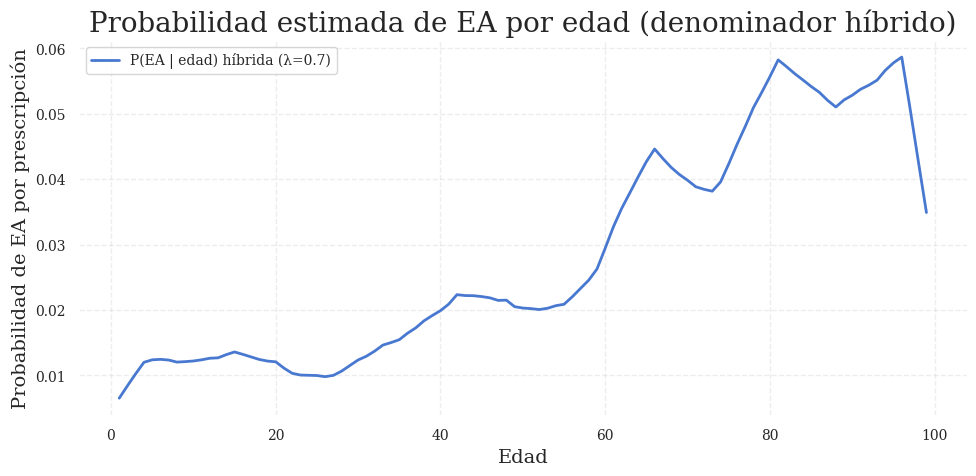

In [100]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

FACTOR_SUBREG = 20.0  # 5% reportados → multiplicar por 20

def p_ea_hibrido_simple(df_expos: pl.DataFrame, lam: float = 0.7, window: int = 7) -> pl.DataFrame:
    """
    Devuelve un DF con:
      - P_exp_h (densidad híbrida)
      - Presc_est_h (denominador absoluto híbrido)
      - EA_estimated (numerador ajustado ×20)
      - p_age_h (prob por prescripción)
      - p_age_h_smooth (suavizado media móvil)
    Requiere en df_expos: ['Age','EA_smooth','P_exp_pob','P_exp_ea','Presc_est_pob'].
    """
    lam = float(np.clip(lam, 0.0, 1.0))

    # total de prescripciones del periodo (ya lo trae df_expos coherente)
    presc_total_all = float(df_expos["Presc_est_pob"].sum())

    # densidad híbrida (normalizada a suma=1)
    p_raw = lam * df_expos["P_exp_pob"] + (1 - lam) * df_expos["P_exp_ea"]
    p_exp_h = p_raw / float(p_raw.sum())

    # denominador absoluto por edad
    presc_est_h = presc_total_all * p_exp_h

    # numerador: EA ajustados por subregistro
    ea_est = df_expos["EA_smooth"] * FACTOR_SUBREG

    # prob por prescripción
    with np.errstate(divide="ignore", invalid="ignore"):
        p_age_h = (ea_est / presc_est_h).to_numpy()
    # limpia y recorta
    p_age_h = np.nan_to_num(p_age_h, nan=0.0, posinf=0.0, neginf=0.0)
    p_age_h = np.clip(p_age_h, 0.0, 1.0)

    # suavizado (media móvil centrada)
    k = max(1, int(window))
    w = np.ones(k) / k
    p_age_h_smooth = np.convolve(p_age_h, w, mode="same")

    # armar DF de salida
    out = df_expos.select(["Age"]).with_columns([
        pl.Series("P_exp_h",       p_exp_h),
        pl.Series("Presc_est_h",   presc_est_h),
        pl.Series("EA_estimated",  ea_est),
        pl.Series("p_age_h",       p_age_h),
        pl.Series("p_age_h_smooth",p_age_h_smooth),
        pl.lit(lam).alias("lambda")
    ]).sort("Age")

    return out

# === ejemplo rápido ===
df_h07 = p_ea_hibrido_simple(df_expos, lam=0.7, window=7)

# plot
plt.figure(figsize=(10,5))
plt.plot(df_h07["Age"], df_h07["p_age_h_smooth"], linewidth=2, label="P(EA | edad) híbrida (λ=0.7)")
plt.xlabel("Edad")
plt.ylabel("Probabilidad de EA por prescripción")
plt.title("Probabilidad estimada de EA por edad (denominador híbrido)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


[λ=0.7] Pearson(p_ea, p_exp_h) =  0.6319
[λ=0.7] KL(q||p) (EA||Híbrido) =  0.1564
[λ=0.7] KL(p||q) (Híbrido||EA) =  0.1627
[λ=0.7] JS(q,p) (simétrica)     =  0.0390


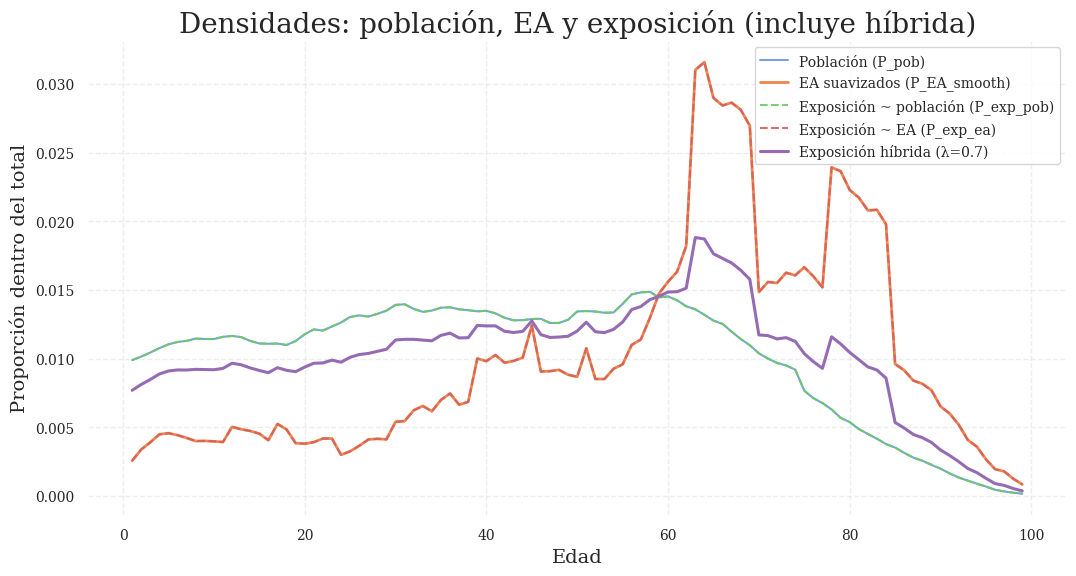

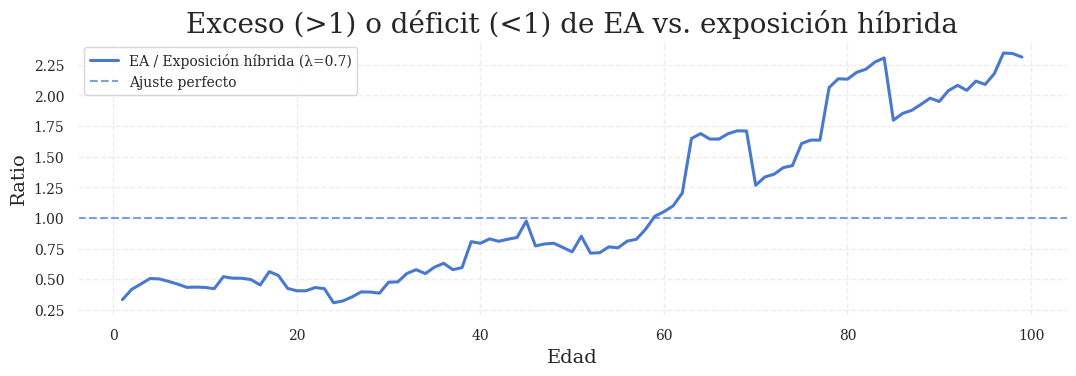

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# -----------------------------
# Parámetros del experimento
# -----------------------------
LAM = 0.7          # mezcla: 1.0 = todo población; 0.0 = todo EA
EPS = 1e-12        # para evitar log(0) en métricas

# -----------------------------
# 1) Extrae arrays desde df_expos
#    (usa exactamente estos nombres de columnas)
# -----------------------------
ages       = df_expos["Age"].to_numpy()
p_pob      = df_expos["P_pob"].to_numpy()             # densidad población (opcional, para comparar)
p_ea       = df_expos["P_EA_smooth"].to_numpy()       # densidad EA ya suavizada
p_exp_pob  = df_expos["P_exp_pob"].to_numpy()         # hipótesis "exposición ~ población"
p_exp_ea   = df_expos["P_exp_ea"].to_numpy()          # hipótesis "exposición ~ EA"

# Asegura que sean densidades (suman ≈1); si ya lo son no pasa nada
def _norm(x):
    s = float(np.nansum(x))
    return x / s if s > 0 else x

p_pob     = _norm(p_pob)
p_ea      = _norm(p_ea)
p_exp_pob = _norm(p_exp_pob)
p_exp_ea  = _norm(p_exp_ea)

# -----------------------------
# 2) Densidad híbrida y normalización
# -----------------------------
p_exp_h_raw = LAM * p_exp_pob + (1.0 - LAM) * p_exp_ea
p_exp_h     = _norm(p_exp_h_raw)

# -----------------------------
# 3) Línea de evaluación (ratio)
#     >1 = más EA de lo esperado (modelo se queda corto)
#     <1 = menos EA de lo esperado (modelo se pasa)
# -----------------------------
ratio_vs_mix = np.divide(
    p_ea,
    p_exp_h,
    out=np.full_like(p_ea, np.nan, dtype=float),
    where=p_exp_h > 0
)

# -----------------------------
# 4) Métricas rápidas de ajuste (opcional pero útil)
# -----------------------------
# Correlación de Pearson entre densidades por edad
pearson = float(np.corrcoef(p_ea, p_exp_h)[0, 1])

# Divergencia KL y JS (simétrica) entre p_ea y p_exp_h
q = np.clip(p_ea,     EPS, 1.0)  # observado (EA)
p = np.clip(p_exp_h,  EPS, 1.0)  # esperado híbrido
m = 0.5 * (p + q)

kl_qp = float(np.sum(q * np.log(q / p)))               # KL(q||p)
kl_pq = float(np.sum(p * np.log(p / q)))               # KL(p||q)
js    = 0.5 * float(np.sum(q * np.log(q / m))) + 0.5 * float(np.sum(p * np.log(p / m)))

print(f"[λ={LAM}] Pearson(p_ea, p_exp_h) = {pearson: .4f}")
print(f"[λ={LAM}] KL(q||p) (EA||Híbrido) = {kl_qp: .4f}")
print(f"[λ={LAM}] KL(p||q) (Híbrido||EA) = {kl_pq: .4f}")
print(f"[λ={LAM}] JS(q,p) (simétrica)     = {js: .4f}")

# -----------------------------
# 5) Figuras
# -----------------------------
Path("visualizations").mkdir(parents=True, exist_ok=True)

# (A) Densidades superpuestas (incluye híbrida)
plt.figure(figsize=(11,6))
plt.plot(ages, p_pob,      linewidth=1.5, alpha=0.7, label="Población (P_pob)")
plt.plot(ages, p_ea,       linewidth=2.0,             label="EA suavizados (P_EA_smooth)")
plt.plot(ages, p_exp_pob,  linewidth=1.5, linestyle="--", alpha=0.9, label="Exposición ~ población (P_exp_pob)")
plt.plot(ages, p_exp_ea,   linewidth=1.5, linestyle="--", alpha=0.9, label="Exposición ~ EA (P_exp_ea)")
plt.plot(ages, p_exp_h,    linewidth=2.2,             label=f"Exposición híbrida (λ={LAM})")
plt.xlabel("Edad")
plt.ylabel("Proporción dentro del total")
plt.title("Densidades: población, EA y exposición (incluye híbrida)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.savefig("visualizations/06_densidades_con_hibrida.png", bbox_inches="tight")
plt.show()

# (B) Línea de exceso/defecto relativa al modelo híbrido
plt.figure(figsize=(11,4))
plt.plot(ages, ratio_vs_mix, linewidth=2.2, label=f"EA / Exposición híbrida (λ={LAM})")
plt.axhline(1.0, linestyle="--", alpha=0.7, label="Ajuste perfecto")
plt.xlabel("Edad")
plt.ylabel("Ratio")
plt.title("Exceso (>1) o déficit (<1) de EA vs. exposición híbrida")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.savefig("visualizations/07_ratio_exceso_defecto_hibrida.png", bbox_inches="tight")
plt.show()


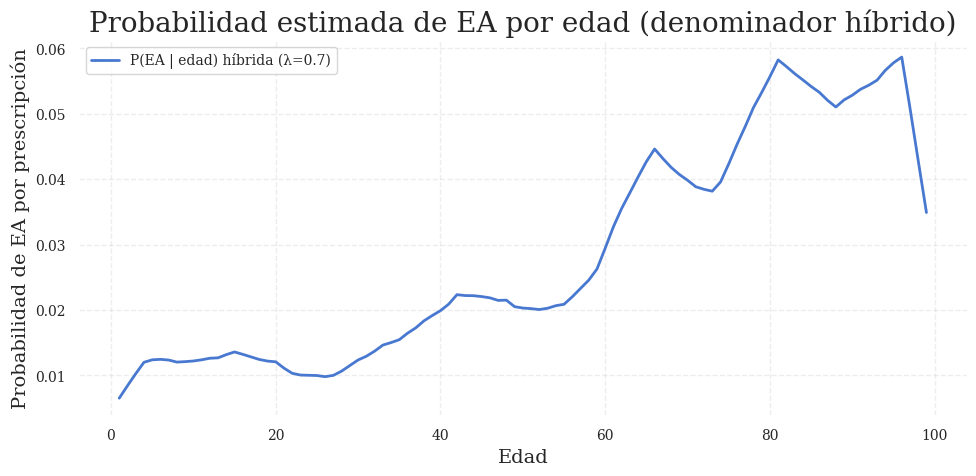

In [110]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

FACTOR_SUBREG = 20.0  # 5% reportados → multiplicar por 20

def p_ea_hibrido_simple(df_expos: pl.DataFrame, lam: float = 0.7, window: int = 7,
                        usar_suavizado: bool = True) -> pl.DataFrame:
    """
    Devuelve un DF por edad con:
      - P_exp_h, Presc_est_h, EA_estimated
      - p_age_h (crudo), p_age_h_smooth (suavizado)
      - prob_ea  -> alias "bonito" para la probabilidad final que usarás
    """
    lam = float(np.clip(lam, 0.0, 1.0))

    # total de prescripciones del periodo
    presc_total_all = float(df_expos["Presc_est_pob"].sum())

    # densidad híbrida (normalizada a suma=1)
    p_raw   = lam * df_expos["P_exp_pob"] + (1 - lam) * df_expos["P_exp_ea"]
    p_sum   = float(p_raw.sum())
    p_exp_h = p_raw / p_sum if p_sum > 0 else p_raw

    # denominador absoluto por edad
    presc_est_h = presc_total_all * p_exp_h

    # numerador: EA ajustados por subregistro
    ea_est = df_expos["EA_smooth"] * FACTOR_SUBREG

    # prob por prescripción
    with np.errstate(divide="ignore", invalid="ignore"):
        p_age_h = (ea_est / presc_est_h).to_numpy()
    p_age_h = np.nan_to_num(p_age_h, nan=0.0, posinf=0.0, neginf=0.0)
    p_age_h = np.clip(p_age_h, 0.0, 1.0)

    # suavizado (media móvil centrada)
    k = max(1, int(window))
    w = np.ones(k) / k
    p_age_h_smooth = np.convolve(p_age_h, w, mode="same")

    # elige qué versión usar como columna "prob_ea"
    prob_ea = p_age_h_smooth if usar_suavizado else p_age_h

    out = df_expos.select(["Age"]).with_columns([
        pl.Series("P_exp_h",         p_exp_h),
        pl.Series("Presc_est_h",     presc_est_h),
        pl.Series("EA_estimated",    ea_est),
        pl.Series("p_age_h",         p_age_h),
        pl.Series("p_age_h_smooth",  p_age_h_smooth),
        pl.Series("prob_ea",         prob_ea),   # 👈 columna lista para usar
        pl.lit(lam).alias("lambda"),
    ]).sort("Age")

    return out

# === ejemplo rápido ===
df_h07 = p_ea_hibrido_simple(df_expos, lam=0.7, window=7, usar_suavizado=True)

# plot de la probabilidad final
plt.figure(figsize=(10,5))
plt.plot(df_h07["Age"], df_h07["prob_ea"], linewidth=2, label="P(EA | edad) híbrida (λ=0.7)")
plt.xlabel("Edad"); plt.ylabel("Probabilidad de EA por prescripción")
plt.title("Probabilidad estimada de EA por edad (denominador híbrido)")
plt.grid(True, linestyle="--", alpha=0.4); plt.legend(); plt.tight_layout(); plt.show()
